In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Define input sentences

sentences = [
    "I love my dog.",
    "i love my cat.",
    "he loves dog!"
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=10)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')
print(padded)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5, 'he': 6, 'loves': 7}
[[1 2 3 4]
 [1 2 3 5]
 [6 7 4 0]]


# Tokenizing the sarcasm dataset

In [15]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-04-12 08:37:09--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:400f:803::2010, 2607:f8b0:400f:804::2010, 2607:f8b0:400f:807::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:400f:803::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  10.0MB/s    in 0.5s    

2022-04-12 08:37:10 (10.0 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [19]:
import json

with open("./sarcasm.json", 'r') as f:
    datastore  = json.load(f)

In [25]:
print("Non-sarcastic headline:\n",datastore[0])
print("\nSarcastic headline:\n",datastore[20000])

Non-sarcastic headline:
 {'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}

Sarcastic headline:
 {'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


In [30]:
sentences=[]
labels=[]
urls=[]

for row in datastore:
    sentences.append(row['headline'])
    labels.append(row['is_sarcastic'])
    urls.append(row['article_link'])


## Pre-processing the headlines

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token='<OOV>')

# Generate the word index dictionary
tokenizer.fit_on_texts(sentences)

# Print the length of the word index
word_index = tokenizer.word_index
print(f"Number of words in word_index: {len(word_index)}")

# # Print the word index
# print("word_index", word_index)

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# Print sample headline
index = 2
print("Sample headline:\n", sentences[index])
print("Padded sequence: \n", padded[index])

# Print dimensions of padded sequences
print("Shape of padded sequences: ",padded.shape)

Number of words in word_index: 29657
Sample headline:
 mom starting to fear son's web series closest thing she will have to grandchild
Padded sequence: 
 [  145   838     2   907  1749  2093   582  4719   221   143    39    46
     2 10736     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Shape of padded sequences:  (26709, 40)


## Training a binary classifier with the IMDB reviews dataset

In [1]:
import numpy as np

In [3]:
import tensorflow_datasets as tfds

# Load the IMDVB Reviews dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

2022-04-12 14:20:49.058133: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/Users/iman/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitIn

In [5]:
print(imdb)

{'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}


In [7]:
for example in imdb['train'].take(2):
    print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

2022-04-12 14:21:19.238747: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [15]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Create sentense and labels lists
training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

# Loop over all training examples and save the sentences and labels
for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)    

## Generate Padded Sequences

In [14]:
# Parameters

vocab_size = 10000
max_length = 120
embeding_dim = 16
trunc_type = 'post'
oov_token = '<OOV>'

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded  = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

## Build and Compile the Model

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [22]:
num_epochs = 10

# Tarin the model
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 3s 2ms/step - loss: 0.6059 - accuracy: 0.6351 - val_loss: 0.3888 - val_accuracy: 0.8235
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.2506 - accuracy: 0.9048 - val_loss: 0.3770 - val_accuracy: 0.8374
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1020 - accuracy: 0.9753 - val_loss: 0.4622 - val_accuracy: 0.8255
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0247 - accuracy: 0.9976 - val_loss: 0.5382 - val_accuracy: 0.8223
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 0.5788 - val_accuracy: 0.8276
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.6405 - val_accuracy: 0.8272
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6922 - val_accuracy: 0.8272
Epoch 

## Visualize Word Embeddings

In [32]:
# Get the embedding layer from the model
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape (vocab_size, embeding_dim)
print(embedding_weights.shape)

(10000, 16)


In [33]:
# Get the index_word dictionary

reverse_word_index = tokenizer.index_word

In [34]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

## Training a binary classifier with the Sarcasm Dataset

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-04-13 22:01:48--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:400f:804::2010, 2607:f8b0:400f:803::2010, 2607:f8b0:400f:802::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:400f:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  9.29MB/s    in 0.6s    

2022-04-13 22:01:49 (9.29 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
with open('./sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for row in datastore:
    sentences.append(row['headline'])
    labels.append(row['is_sarcastic'])

labels = np.array(labels)

In [59]:
# Parameters
vocab_size = 5000
embedding_dim = 8
max_length = 64
trunc_type = 'post'
padding_type = 'post'
oov_token ='<OOV>'
training_size = 20000

In [60]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[20000:]
testing_labels = labels[20000:]

In [61]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 64, 8)             40000     
_________________________________________________________________
global_average_pooling1d_12  (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 40,241
Trainable params: 40,241
Non-trainable params: 0
_________________________________________________________________


In [63]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6517 - accuracy: 0.6102 - val_loss: 0.5319 - val_accuracy: 0.7918
Epoch 2/30
625/625 - 0s - loss: 0.4066 - accuracy: 0.8356 - val_loss: 0.3785 - val_accuracy: 0.8404
Epoch 3/30
625/625 - 0s - loss: 0.3165 - accuracy: 0.8681 - val_loss: 0.3631 - val_accuracy: 0.8427
Epoch 4/30
625/625 - 0s - loss: 0.2767 - accuracy: 0.8868 - val_loss: 0.3554 - val_accuracy: 0.8447
Epoch 5/30
625/625 - 0s - loss: 0.2500 - accuracy: 0.8974 - val_loss: 0.3557 - val_accuracy: 0.8463
Epoch 6/30
625/625 - 0s - loss: 0.2323 - accuracy: 0.9057 - val_loss: 0.3662 - val_accuracy: 0.8456
Epoch 7/30
625/625 - 0s - loss: 0.2179 - accuracy: 0.9121 - val_loss: 0.3788 - val_accuracy: 0.8438
Epoch 8/30
625/625 - 0s - loss: 0.2065 - accuracy: 0.9157 - val_loss: 0.3922 - val_accuracy: 0.8429
Epoch 9/30
625/625 - 0s - loss: 0.1981 - accuracy: 0.9209 - val_loss: 0.4045 - val_accuracy: 0.8413
Epoch 10/30
625/625 - 0s - loss: 0.1905 - accuracy: 0.9255 - val_loss: 0.4236 - val_accuracy: 0.8383

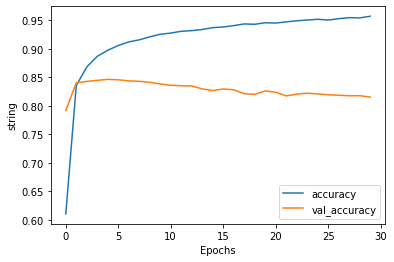

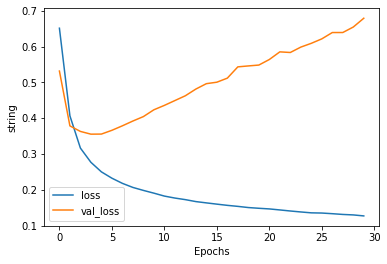

In [64]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel("string")
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Single Layer LSTM

In [1]:
import numpy as np

In [2]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

2022-04-14 10:47:39.728120: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE =256

# Get the train and test split
train_data, test_data = dataset['train'], dataset['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequeces
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [4]:
import tensorflow as tf

# Hyperparametes
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 519s 5s/step - loss: 0.5511 - accuracy: 0.7099 - val_loss: 0.4298 - val_accuracy: 0.8126
Epoch 2/10
98/98 [==============================] - 495s 5s/step - loss: 0.3108 - accuracy: 0.8765 - val_loss: 0.3546 - val_accuracy: 0.8629
Epoch 3/10
98/98 [==============================] - 454s 5s/step - loss: 0.2966 - accuracy: 0.8930 - val_loss: 0.3669 - val_accuracy: 0.8442
Epoch 4/10
98/98 [==============================] - 447s 5s/step - loss: 0.1956 - accuracy: 0.9313 - val_loss: 0.3906 - val_accuracy: 0.8452
Epoch 5/10
98/98 [==============================] - 458s 5s/step - loss: 0.1615 - accuracy: 0.9446 - val_loss: 0.4120 - val_accuracy: 0.8433
Epoch 6/10
98/98 [==============================] - 498s 5s/step - loss: 0.1275 - accuracy: 0.9575 - val_loss: 0.4748 - val_accuracy: 0.8529
Epoch 7/10
98/98 [==============================] - 501s 5s/step - loss: 0.2025 - accuracy: 0.9264 - val_loss: 0.4725 - val_accuracy: 0.8302
Epoch 8/10
98

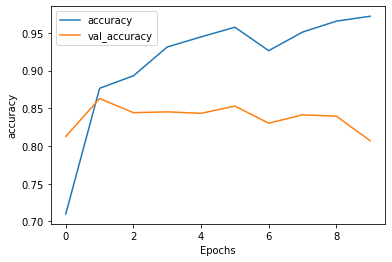

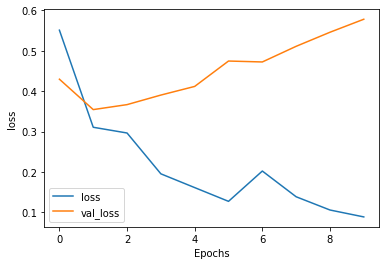

In [7]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")